LetsGrowMore Data Science Internship (VIP)

Name: Harish Seenivasan

Title: Develop A Neural Network That Can Read Handwriting

Level: Advanced

Batch: May

Step 1: Data Collection

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Reading the dataset

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Task 5/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Task 5/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Step 2: Understanding the Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [8]:
X = train.drop(["label"],axis=1).values
Y = train["label"].values

Step 3: Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


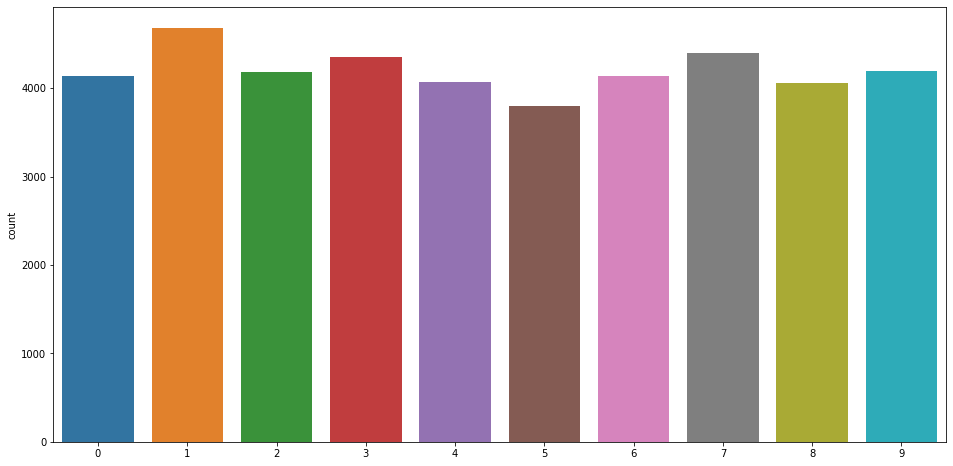

In [9]:
plt.figure(figsize = (16,8))
sns.countplot(Y)

Here we are displaying the input images

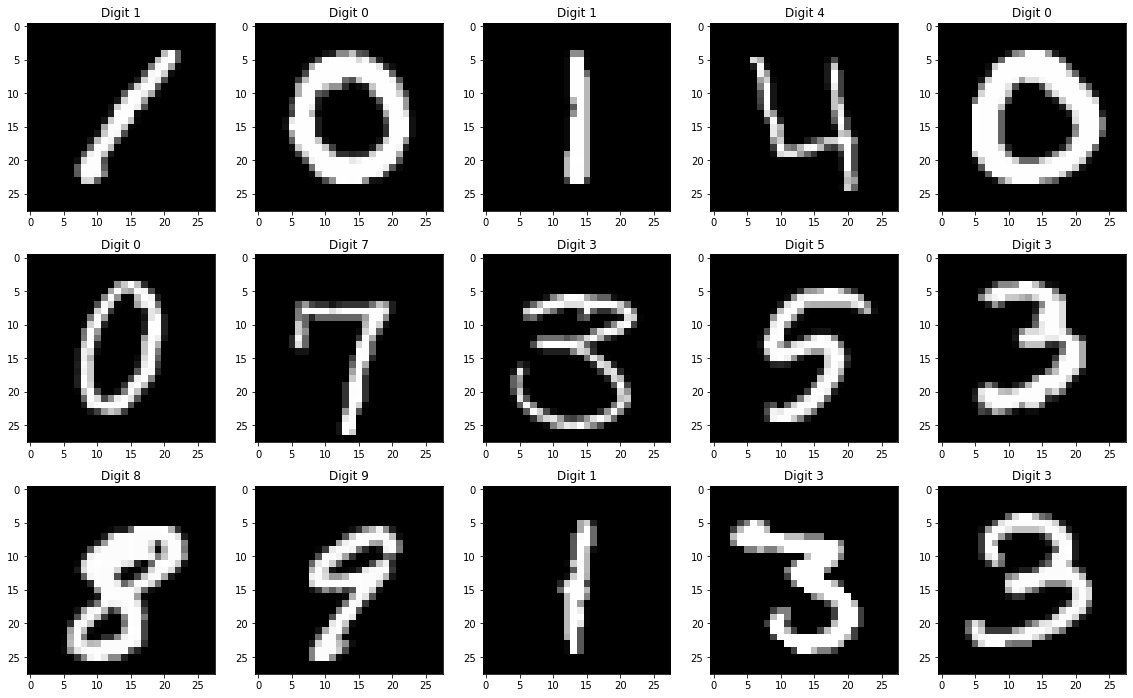

In [11]:
X_plot = X.reshape(-1, 28, 28)
def digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for z in range(15):
        plt.subplot(5, 5,z+1)
        plt.imshow(X_plot[z], cmap = mono)
        plt.title("Digit {}".format(Y[z]))
        
    plt.tight_layout()
    
digits()

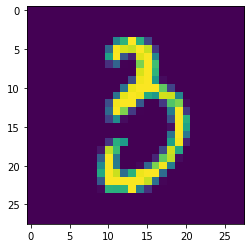

In [12]:
plt.imshow(X[150].reshape([28,28]))

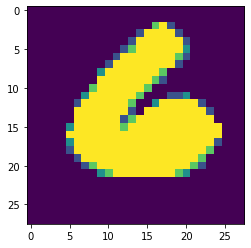

In [13]:
plt.imshow(X[500].reshape([28,28]))

Step 4: Data Transformation

In [14]:
X= X.reshape([42000,28,28,1])
Y= Y.reshape([42000,1])

Here we are converting the input to categorical values where we have classes from 0-9

In [15]:
from keras.utils.np_utils import to_categorical
Y=to_categorical(Y,num_classes=10)

Step 5: Model Building

To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts with 80%-20%. One part of the data is used to build the machine learning model, and is called the training data (i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test data(i.e. X_test, y_test).

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

Here we are creating aur network with sequential model with layers

Conv2D = This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

MaxPooling2D = Max pooling layer for 2D inputs

Dropout = The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

In [17]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [19]:
history=model.fit(x_train,y_train,batch_size=256,epochs=20)

Epoch 1/20
132/132 [==============================] - 14s 15ms/step - loss: 0.4672 - binary_accuracy: 0.8988
Epoch 2/20
132/132 [==============================] - 2s 14ms/step - loss: 0.1301 - binary_accuracy: 0.9564
Epoch 3/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0587 - binary_accuracy: 0.9830
Epoch 4/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0412 - binary_accuracy: 0.9885
Epoch 5/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0323 - binary_accuracy: 0.9911
Epoch 6/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0268 - binary_accuracy: 0.9926
Epoch 7/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0246 - binary_accuracy: 0.9931
Epoch 8/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0225 - binary_accuracy: 0.9939
Epoch 9/20
132/132 [==============================] - 2s 14ms/step - loss: 0.0209 - binary_accuracy: 0.9942
Epoch 10/20
132/132 [======

The model summary table reports the strength of the relationship between the model and the dependent variable

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

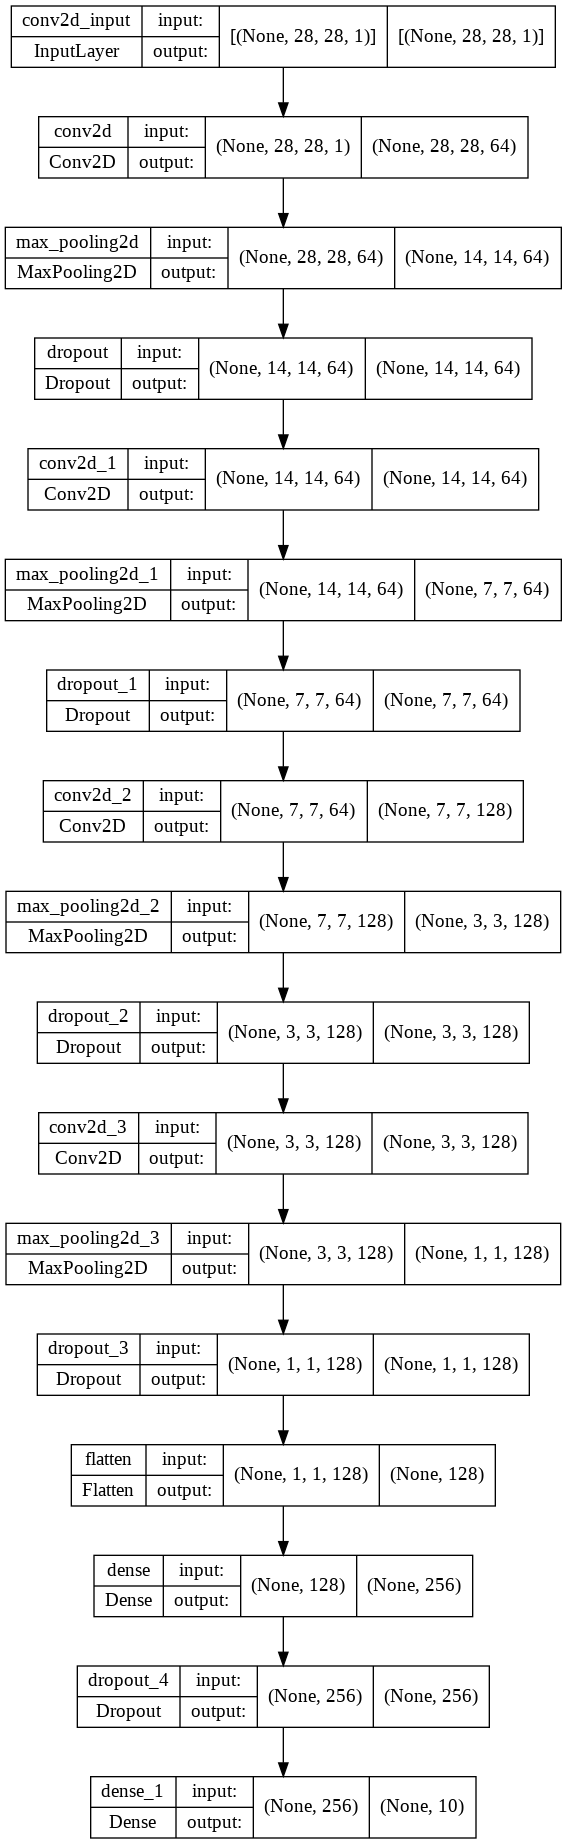

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

Prediction

In [22]:
y_pred=model.predict(x_test)
y_pred

array([[9.92386675e-19, 5.20542133e-14, 4.99321016e-13, ...,
        1.00000000e+00, 2.88144642e-15, 2.94385974e-11],
       [4.41237509e-30, 2.28615511e-27, 4.24792226e-23, ...,
        4.12979539e-23, 2.05763323e-25, 2.17262454e-23],
       [2.31605913e-14, 4.56628347e-15, 7.68522778e-13, ...,
        2.04771113e-11, 3.04481371e-11, 1.00000000e+00],
       ...,
       [3.29288256e-18, 3.95559682e-19, 1.15099385e-21, ...,
        1.59716613e-23, 1.36040191e-17, 1.73306132e-21],
       [2.97624614e-17, 4.42967865e-15, 1.75791676e-14, ...,
        1.38844802e-14, 1.76699394e-13, 4.70034428e-12],
       [5.57757061e-16, 1.00000000e+00, 4.42308083e-13, ...,
        7.23852131e-13, 1.01530905e-13, 1.44746038e-14]], dtype=float32)

Plotting the garph of loss data

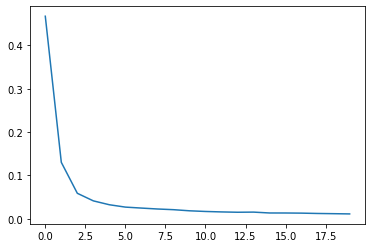

In [23]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()

Model Evaluation

In [24]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 4ms/step - loss: 0.0049 - binary_accuracy: 0.9984


[0.00491606118157506, 0.9984042644500732]

So we are getting 99% of accuracy for our network that can read handwriting